# Import Libraries

In [206]:
import numpy as np
import pandas as pd
print(np.__version__)
print(pd.__version__)

1.24.3
2.2.2


# Read Data

In [208]:
churn = pd.read_csv("Churn_Modelling.csv")

In [209]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Drop Unnecessary columns

In [211]:
churn.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

In [212]:
churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [213]:
churn.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

# Convert categorical columns into numerical columns using one-hot encoding

In [215]:
churn = pd.get_dummies(churn, columns=["Geography", "Gender"], drop_first=True, dtype="int")

In [216]:
churn

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


# Separate Input Columns and Output Columns

In [218]:
X = churn.drop(columns=["Exited"]) # Input Columns
y = churn["Exited"] # Predicted Columns

In [219]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Scalling the data

In [221]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_transform = scaler.fit_transform(X_train)
x_test_transform = scaler.transform(X_test)

# Creating neural network (ANN)

In [223]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [224]:
model = Sequential()

model.add(Dense(3, activation="relu", input_dim=11)) # 1st hidden layer
model.add(Dense(3, activation="relu")) # 2nd hidden layer
model.add(Dense(1, activation="sigmoid")) # output layer

In [225]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 3)                 36        
                                                                 
 dense_10 (Dense)            (None, 3)                 12        
                                                                 
 dense_11 (Dense)            (None, 1)                 4         
                                                                 
Total params: 52 (208.00 Byte)
Trainable params: 52 (208.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [226]:
model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train Model

In [228]:
history = model.fit(X_train,y_train, batch_size=50, epochs=30, verbose=1, validation_split=0.2)

Epoch 1/30
128/128 [==============================] - 1s 3ms/step - loss: 4189.0767 - accuracy: 0.5111 - val_loss: 2603.5378 - val_accuracy: 0.5312
Epoch 2/30
128/128 [==============================] - 0s 2ms/step - loss: 1599.7534 - accuracy: 0.5300 - val_loss: 908.6925 - val_accuracy: 0.5306
Epoch 3/30
128/128 [==============================] - 0s 2ms/step - loss: 470.7385 - accuracy: 0.5322 - val_loss: 179.7540 - val_accuracy: 0.5294
Epoch 4/30
128/128 [==============================] - 0s 2ms/step - loss: 43.2126 - accuracy: 0.6359 - val_loss: 0.8978 - val_accuracy: 0.7700
Epoch 5/30
128/128 [==============================] - 0s 2ms/step - loss: 0.9065 - accuracy: 0.7659 - val_loss: 0.8262 - val_accuracy: 0.7731
Epoch 6/30
128/128 [==============================] - 0s 2ms/step - loss: 0.8412 - accuracy: 0.7691 - val_loss: 0.7688 - val_accuracy: 0.7756
Epoch 7/30
128/128 [==============================] - 0s 2ms/step - loss: 0.7884 - accuracy: 0.7711 - val_loss: 0.7217 - val_accurac

In [229]:
y_pred = model.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [230]:
y_pred

array([[0.20488212],
       [0.20488212],
       [0.20488212],
       ...,
       [0.20488212],
       [0.20488212],
       [0.20488212]], dtype=float32)

In [231]:
model.layers[0].get_weights()

[array([[-0.48831332,  0.04415772,  0.03694373],
        [-0.547632  , -0.01182717,  0.59861434],
        [ 0.48073363, -0.61717486, -0.0316726 ],
        [-0.13634712, -0.47625396, -0.4712773 ],
        [ 0.31790793, -0.08460159, -0.3641446 ],
        [ 0.01358688,  0.03306086, -0.33297652],
        [ 0.30550385,  0.02897296, -0.07845397],
        [-0.12148577, -0.01139128, -0.16387793],
        [-0.6169033 , -0.5198651 ,  0.15816498],
        [-0.15018374,  0.13039902,  0.0542112 ],
        [-0.3358865 , -0.17658342, -0.37670863]], dtype=float32),
 array([ 0.        , -0.4470464 ,  0.02555757], dtype=float32)]

In [232]:
y_log = model.predict(x_test_transform)

63/63 [==============================] - 0s 1ms/step


# Threshold

In [234]:
y_pred = np.where(y_log>0.5,1,0)

In [235]:
# y_pred = y_pred.argmax(axis=1)

In [236]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8035

In [268]:
history.history

{'loss': [4189.07666015625,
  1599.75341796875,
  470.738525390625,
  43.21257019042969,
  0.906521737575531,
  0.8411870002746582,
  0.7884214520454407,
  0.744086503982544,
  0.7057566046714783,
  0.6732646226882935,
  0.6456903219223022,
  0.6225433945655823,
  0.6036853790283203,
  0.5881041288375854,
  0.5752780437469482,
  0.5643697381019592,
  0.5551373362541199,
  0.5471349358558655,
  0.5403658151626587,
  0.5345796346664429,
  0.5298811197280884,
  0.5259214639663696,
  0.5224924683570862,
  0.5195472240447998,
  0.5171806812286377,
  0.5153058171272278,
  0.5139181017875671,
  0.5128893852233887,
  0.5119186639785767,
  0.5111193656921387],
 'accuracy': [0.5110937356948853,
  0.5299999713897705,
  0.5321875214576721,
  0.635937511920929,
  0.7659375071525574,
  0.7690625190734863,
  0.7710937261581421,
  0.7729687690734863,
  0.7743750214576721,
  0.7759374976158142,
  0.77734375,
  0.7795312404632568,
  0.78125,
  0.7821875214576721,
  0.7832812666893005,
  0.78406250476837

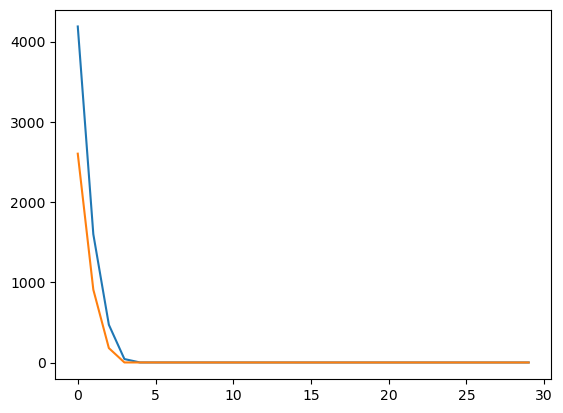

In [237]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

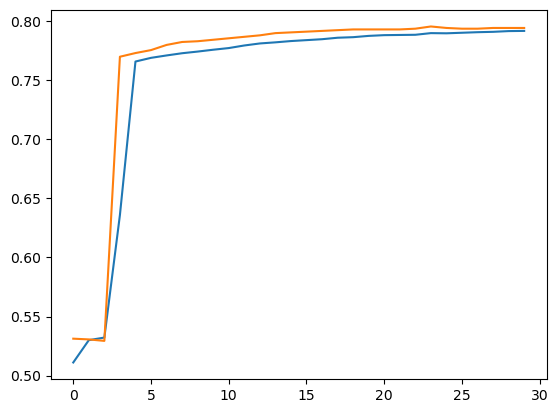

In [238]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])